# 3_choose_learning_machine_models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the file 
data = pd.read_csv('../data/cleaned_data/cleaned_data.csv')
data.head()


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_F,gender_M,work_type_Govt_job,work_type_Other,work_type_Private,work_type_Self-employed,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.798993,0.0,1.0,1.0,0.958108,0.698613,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.720732,0.0,0.0,1.0,0.922984,0.556160,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.972816,0.0,1.0,1.0,0.633325,0.627946,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.569120,0.0,0.0,1.0,0.867266,0.661613,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.959265,1.0,0.0,1.0,0.873349,0.452413,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


### x/y split

In [3]:
#separate the features from the labels
y = data['stroke']
X = data.drop(['stroke'], axis=1)

In [4]:
y.head(1)

0    1.0
Name: stroke, dtype: float64

In [7]:
# change the type of 'y'
y = y.astype('int64')
y.dtypes

dtype('int64')

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [12]:
display(y_train.value_counts())
display(y_test.value_counts())

stroke
0    3875
1     201
Name: count, dtype: int64

stroke
0    972
1     48
Name: count, dtype: int64

##### As I mentioned earlier, it is clearly imbalanced and it needs Random oversampling  or SMOTE. 
##### Random oversampling can lead to overfitting, while SMOTE can help to reduce overfitting, as it increases the diversity in the dataset. In this case, SMOTE was chosen.
reference: https://www.quora.com/Whats-the-difference-between-random-oversampling-and-oversampling-using-SMOTE-on-an-imbalanced-dataset-Is-the-later-always-better-then-the-first 

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
# Fit and apply SMOTE to generate synthetic samples for the minority class
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [18]:
X_resampled.shape

(7750, 18)

In [19]:
class_counts = y_resampled.value_counts()
print(class_counts)

stroke
0    3875
1    3875
Name: count, dtype: int64


In [66]:
# In order to apply K-NN, the type 'y' are changed into '~Object' 
y_resampled_obj = y_resampled.apply(lambda x: str(x))
y_resampled_obj.dtypes

dtype('O')

In [21]:
# save train and test sets 

X_resampled.to_csv('../data/x_y_data/X_resampled.csv', index=False)
y_resampled.to_csv('../data/x_y_data/y_resampled.csv', index=False)
X_test.to_csv('../data/x_y_data/X_test.csv', index=False)
y_test.to_csv('../data/x_y_data/y_test.csv', index=False)

### Choosing models

In [40]:
X_resampled.shape

(7750, 18)

In [43]:
y_resampled.shape

(7750,)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('GB', GradientBoostingClassifier(random_state = 12345)))
models.append(('AB', AdaBoostClassifier(random_state = 12345)))

In [91]:
# evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

X_resampled2 = np.ascontiguousarray(X_resampled)
y_resampled2 = np.ascontiguousarray(y_resampled)

names = []
results = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results = cross_val_score(model, X_resampled2, y_resampled2, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean()} ({cv_results.std()})"
    print(msg)


LR: 0.755483870967742 (0.04424226182655737)
KNN: 0.8992258064516129 (0.0690833696825897)
RF: 0.9469677419354838 (0.02511625415313167)
GB: 0.8603870967741936 (0.04768191519245422)
AB: 0.8105806451612902 (0.061005927621787685)


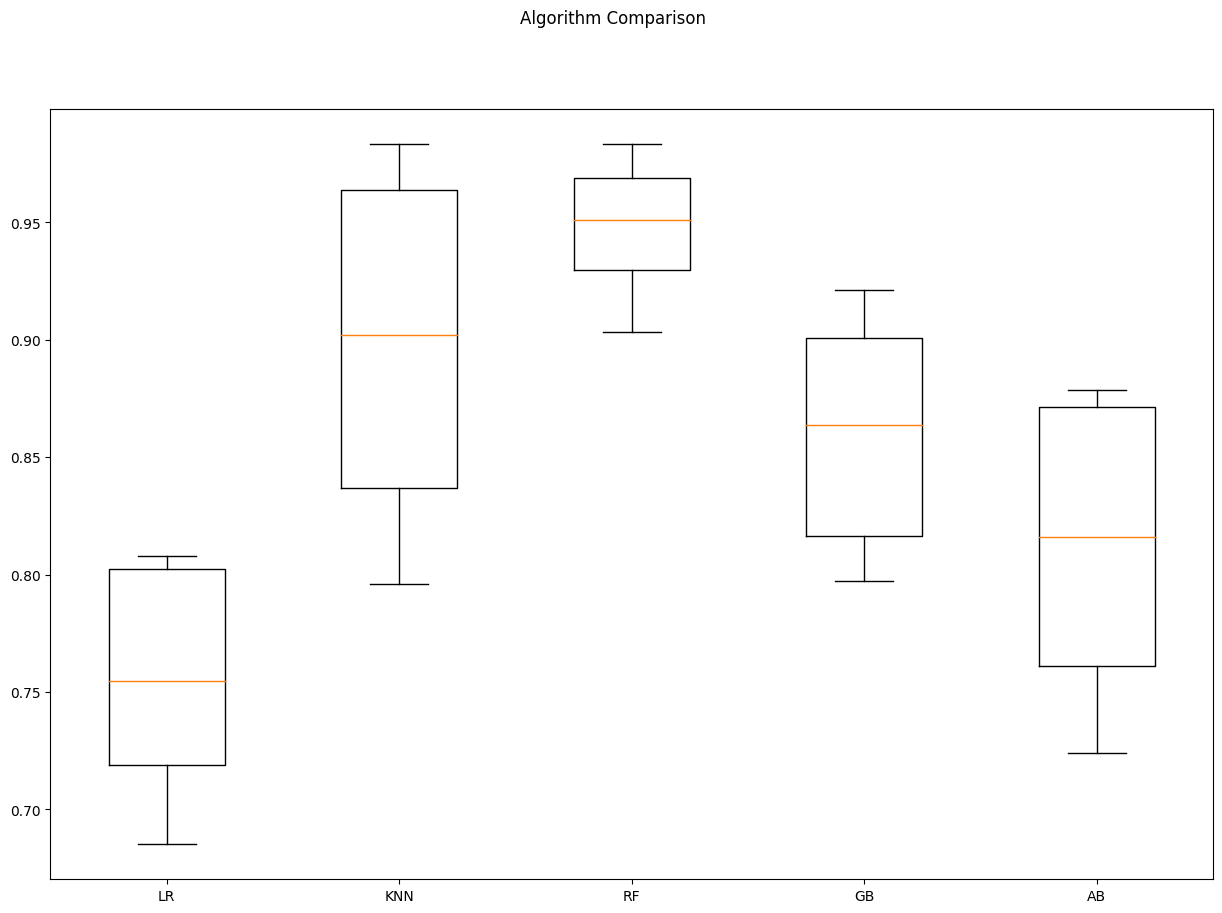

In [92]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

####  KNN and Random Forest  are chosen. In addition, nuural network is investigated.

In [93]:
names

['LR', 'KNN', 'RF', 'GB', 'AB']

In [94]:
results

[array([0.70322581, 0.72774194, 0.71612903, 0.68516129, 0.74193548,
        0.80645161, 0.76774194, 0.80774194, 0.80516129, 0.79354839]),
 array([0.8283871 , 0.83225806, 0.85032258, 0.79612903, 0.85419355,
        0.94967742, 0.95612903, 0.98322581, 0.96645161, 0.97548387]),
 array([0.92903226, 0.91483871, 0.9316129 , 0.90322581, 0.94580645,
        0.96903226, 0.95612903, 0.98322581, 0.96774194, 0.96903226]),
 array([0.81290323, 0.82709677, 0.79741935, 0.79870968, 0.83870968,
        0.89677419, 0.88903226, 0.92      , 0.92129032, 0.90193548]),
 array([0.75741935, 0.7716129 , 0.72903226, 0.72387097, 0.77806452,
        0.86064516, 0.85419355, 0.87741935, 0.87870968, 0.87483871])]

In [95]:
results_dict = {name: result for name, result in zip(names, results)}

# Create the DataFrame using the dictionary
score = pd.DataFrame(results_dict)

# Print the DataFrame
display(score)

,LR,KNN,RF,GB,AB
0,0.703226,0.828387,0.929032,0.812903,0.757419
1,0.727742,0.832258,0.914839,0.827097,0.771613
2,0.716129,0.850323,0.931613,0.797419,0.729032
3,0.685161,0.796129,0.903226,0.798710,0.723871
4,0.741935,0.854194,0.945806,0.838710,0.778065
5,0.806452,0.949677,0.969032,0.896774,0.860645
6,0.767742,0.956129,0.956129,0.889032,0.854194
7,0.807742,0.983226,0.983226,0.920000,0.877419
8,0.805161,0.966452,0.967742,0.921290,0.878710
9,0.793548,0.975484,0.969032,0.901935,0.874839


In [96]:
score.to_csv('../data/score/scores_5_models.csv', index=False)

#### recall

In [101]:
#evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

X_resampled2 = np.ascontiguousarray(X_resampled)
y_resampled2 = np.ascontiguousarray(y_resampled)

names2 = []
results2 = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results2 = cross_val_score(model, X_resampled2, y_resampled2, cv=kfold, scoring="recall")
    results2.append(cv_results2)
    names2.append(name)
    msg2 = f"{name}: {cv_results2.mean()} ({cv_results2.std()})"
    print(msg2)


LR: 0.8223755047034569 (0.033157823346994166)
KNN: 0.9748159185915679 (0.017415848453062176)
RF: 0.8869544969196757 (0.08768720596000759)
GB: 0.7744458513208163 (0.1375489519680115)
AB: 0.7995943426968569 (0.09321519104212649)


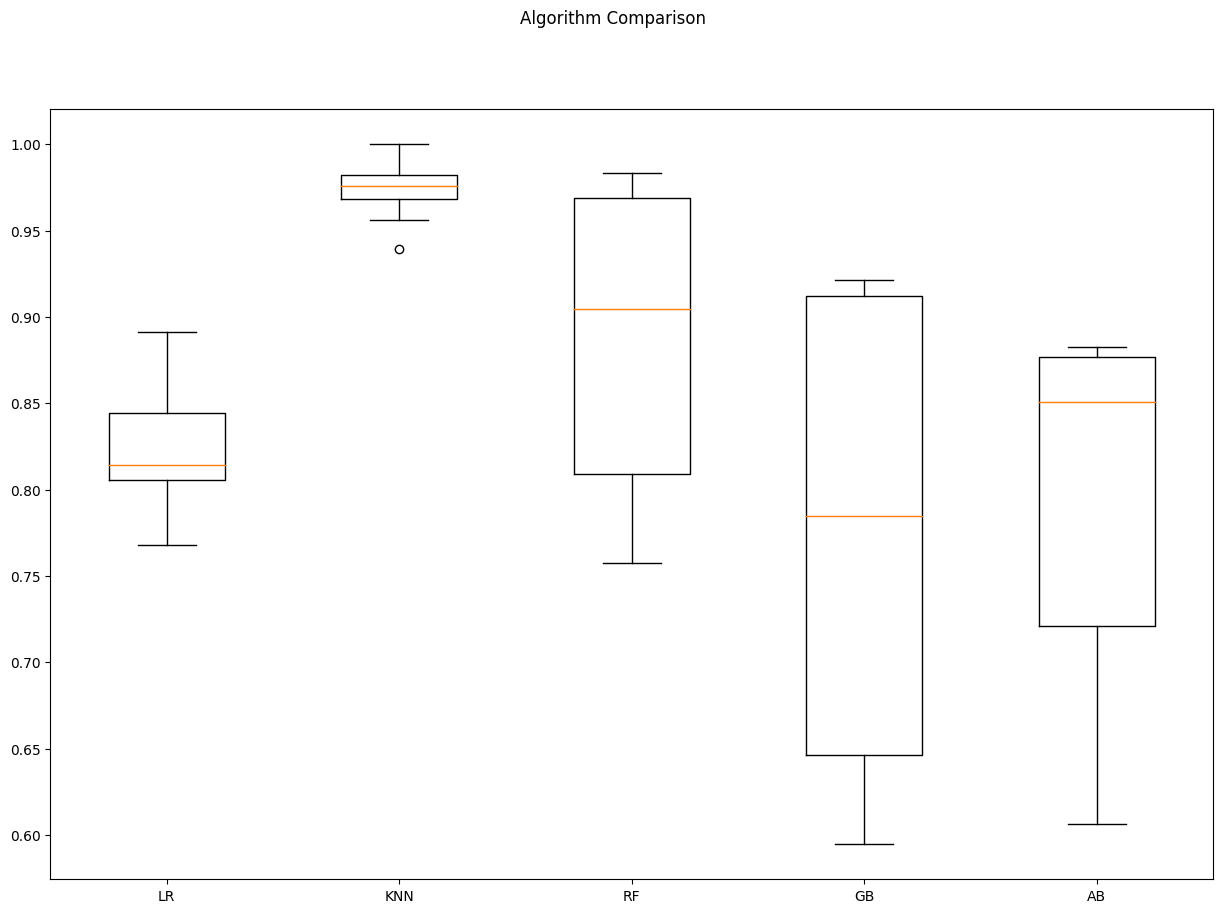

In [102]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()

In [103]:
results_dict2 = {name2: result2 for name2, result2 in zip(names2, results2)}

# Create the DataFrame using the dictionary
score2 = pd.DataFrame(results_dict2)

# Print the DataFrame
display(score2)

,LR,KNN,RF,GB,AB
0,0.818182,0.939394,0.757576,0.636364,0.606061
1,0.891304,1.000000,0.782609,0.608696,0.847826
2,0.851064,0.978723,0.808511,0.680851,0.765957
3,0.810811,0.972973,0.810811,0.594595,0.702703
4,0.852941,1.000000,0.852941,0.676471,0.705882
5,0.825260,0.975779,0.980969,0.915225,0.882353
6,0.767742,0.956129,0.956129,0.889032,0.854194
7,0.807742,0.983226,0.983226,0.920000,0.877419
8,0.805161,0.966452,0.967742,0.921290,0.878710
9,0.793548,0.975484,0.969032,0.901935,0.874839


In [104]:
score2.to_csv('../data/score/scores_5_models_recall.csv', index=False)

### Precision

In [107]:
#evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

X_resampled3 = np.ascontiguousarray(X_resampled)
y_resampled3 = np.ascontiguousarray(y_resampled)

names3 = []
results3 = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results3 = cross_val_score(model, X_resampled3, y_resampled3, cv=kfold, scoring="precision")
    results3.append(cv_results3)
    names3.append(name)
    msg3 = f"{name}: {cv_results3.mean()} ({cv_results3.std()})"
    print(msg3)


LR: 0.5580332333487927 (0.4244834566465215)
KNN: 0.611381213945366 (0.38129944107388847)
RF: 0.6925043799464734 (0.30582104319075315)
GB: 0.5762211520760155 (0.4133605340041035)
AB: 0.5612200565980375 (0.42526495872236564)


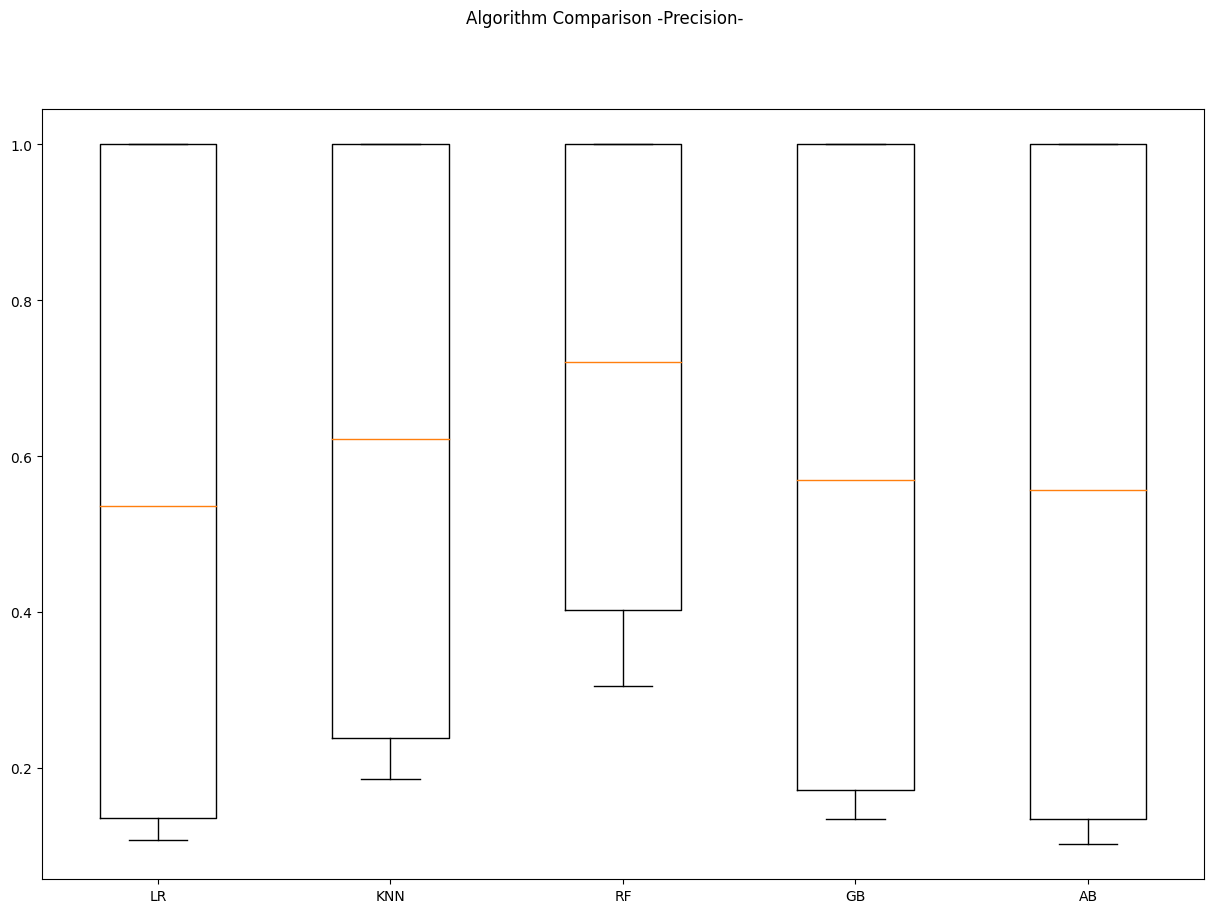

In [108]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison -Precision-')
ax = fig.add_subplot(111)
plt.boxplot(results3)
ax.set_xticklabels(names3)
plt.show()

In [109]:
results_dict3 = {name3: result3 for name3, result3 in zip(names3, results3)}

# Create the DataFrame using the dictionary
score3 = pd.DataFrame(results_dict3)

# Print the DataFrame
display(score3)

,LR,KNN,RF,GB,AB
0,0.107570,0.191358,0.347222,0.136364,0.102564
1,0.165992,0.261364,0.391304,0.194444,0.186603
2,0.158103,0.285714,0.463415,0.183908,0.153191
3,0.112360,0.186528,0.306122,0.134969,0.113537
4,0.129464,0.231293,0.439394,0.167883,0.129032
5,0.906844,0.957555,0.977586,0.944643,0.927273
6,1.000000,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
score3.to_csv('../data/score/scores_5_models_precision.csv', index=False)

### f1

In [116]:
#evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

X_resampled4 = np.ascontiguousarray(X_resampled)
y_resampled4 = np.ascontiguousarray(y_resampled)

names4 = []
results4 = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results4 = cross_val_score(model, X_resampled4, y_resampled4, cv=kfold, scoring="f1")
    results4.append(cv_results4)
    names4.append(name)
    msg4 = f"{name}: {cv_results4.mean()} ({cv_results4.std()})"
    print(msg4)


LR: 0.5562194431344551 (0.32556271881759635)
KNN: 0.6769629854890884 (0.30649696907799)
RF: 0.7527789639026619 (0.23394220716569455)
GB: 0.6034698302957008 (0.344699527973212)
AB: 0.5779318943569902 (0.34950709039048355)


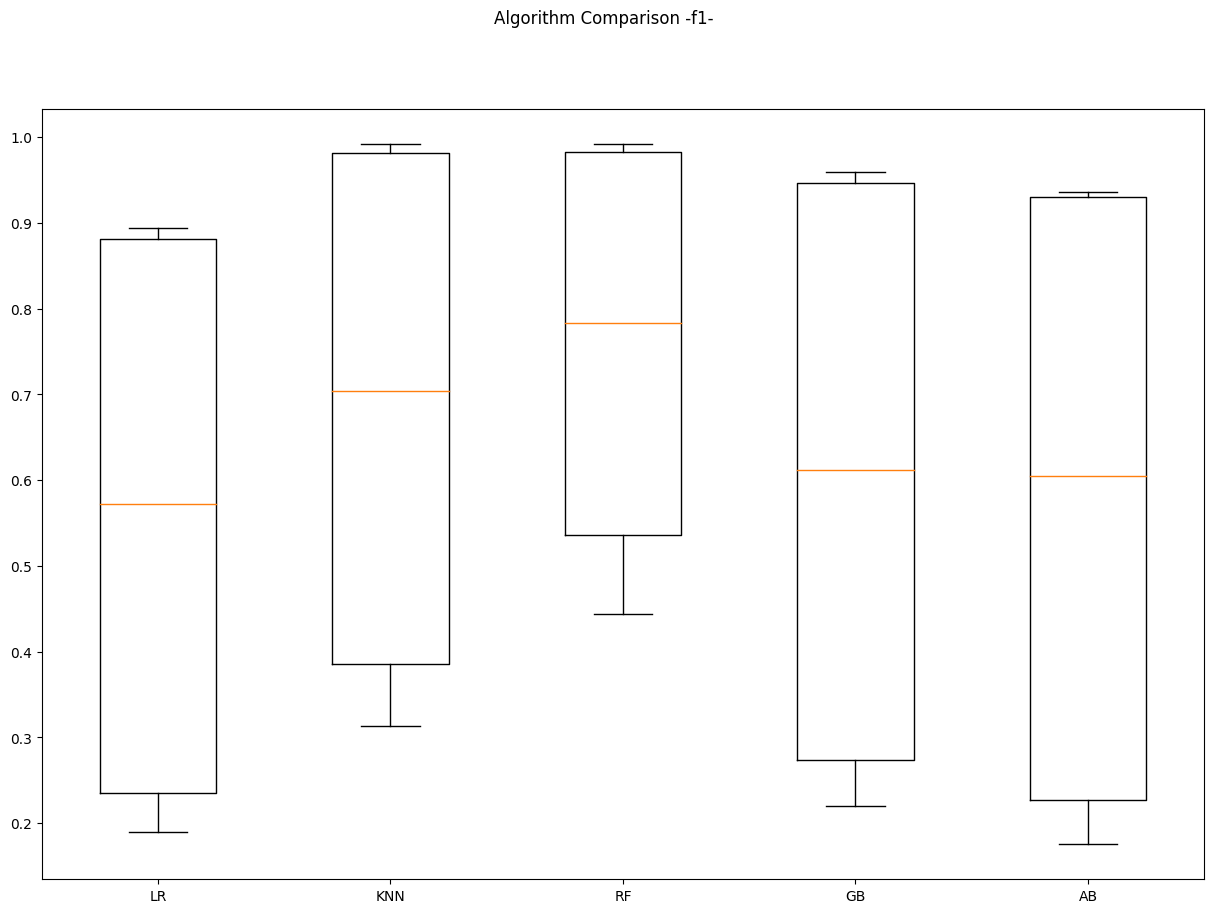

In [117]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison -f1-')
ax = fig.add_subplot(111)
plt.boxplot(results4)
ax.set_xticklabels(names4)
plt.show()

In [118]:
results_dict4 = {name4: result4 for name4, result4 in zip(names4, results4)}

# Create the DataFrame using the dictionary
score4 = pd.DataFrame(results_dict4)

# Print the DataFrame
display(score4)

,LR,KNN,RF,GB,AB
0,0.190141,0.317949,0.476190,0.224599,0.175439
1,0.279863,0.414414,0.521739,0.294737,0.305882
2,0.266667,0.442308,0.589147,0.289593,0.255319
3,0.197368,0.313043,0.444444,0.220000,0.195489
4,0.224806,0.375691,0.580000,0.269006,0.218182
5,0.864130,0.966581,0.979275,0.929701,0.904255
6,0.868613,0.977573,0.977573,0.941257,0.921364
7,0.893647,0.991542,0.991542,0.958333,0.934708
8,0.892066,0.982940,0.983607,0.959033,0.935440
9,0.884892,0.987590,0.984273,0.948440,0.933242


In [119]:
score4.to_csv('../data/score/scores_5_models_f1.csv', index=False)